In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
mar_df = pd.read_csv('SINASC_RO_2019_MAR.csv')
abr_df = pd.read_csv('SINASC_RO_2019_ABR.csv')
mai_df = pd.read_csv('SINASC_RO_2019_MAI.csv')
jun_df = pd.read_csv('SINASC_RO_2019_JUN.csv')
dez_df = pd.read_csv('SINASC_RO_2019_DEZ.csv')

mar_df.head()

,IDADEMAE,SEXO,APGAR1,APGAR5,PESO,CONSULTAS,DTNASC,GESTACAO,GRAVIDEZ,ESCMAE,IDADEPAI
0,19,Masculino,9.0,10.0,3685,4,2019-02-19,37 a 41 semanas,Única,8 a 11 anos,26.0
1,29,Feminino,8.0,9.0,3055,4,2019-02-21,37 a 41 semanas,Única,8 a 11 anos,24.0
2,37,Feminino,8.0,10.0,3460,4,2019-02-25,37 a 41 semanas,Única,8 a 11 anos,32.0
3,30,Feminino,9.0,10.0,2982,3,2019-03-20,37 a 41 semanas,Única,12 anos ou mais,24.0
4,30,Feminino,8.0,10.0,3310,4,2019-03-23,37 a 41 semanas,Única,8 a 11 anos,27.0


In [5]:
concat_df = pd.concat([mar_df, abr_df, mai_df, jun_df, dez_df])

In [6]:
concat_df['DTNASC'] = pd.to_datetime(concat_df['DTNASC'])

In [7]:
concat_df['MONTH'] = concat_df['DTNASC'].dt.month

In [8]:
grafico = concat_df.groupby('MONTH')['CONSULTAS'].mean().sort_index()

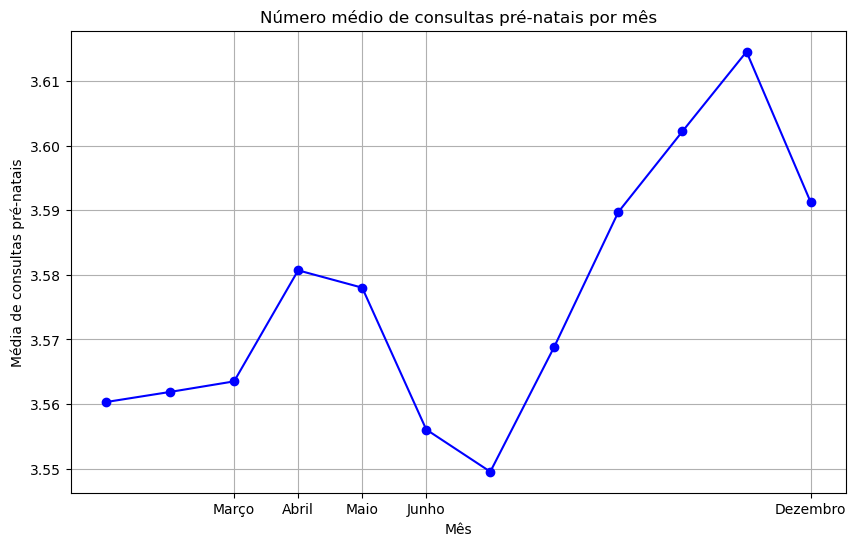

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(grafico.index, grafico.values, marker='o', linestyle='-', color='b')
plt.title('Número médio de consultas pré-natais por mês')
plt.xlabel('Mês')
plt.ylabel('Média de consultas pré-natais')

# Creating custom labels for the x-axis
meses = {3: 'Março', 4: 'Abril', 5: 'Maio', 6: 'Junho', 12: 'Dezembro'}
plt.xticks(list(month_labels.keys()), list(month_labels.values()))

plt.grid(True)
plt.show()


In [ ]:
Criar uma função em Python que encapsula todo o processo de leitura de dados, processamento e plotagem do gráfico. 
Essa função pode aceitar argumentos como o caminho do arquivo, colunas de interesse, e outros parâmetros de plotagem.

In [18]:
def plot_prenatal_consultas(file_paths, year):
    dfs = [pd.read_csv(f) for f in file_paths]
    concat_df = pd.concat(dfs)
    concat_df['DTNASC'] = pd.to_datetime(concat_df['DTNASC'])
    concat_df['MONTH'] = concat_df['DTNASC'].dt.month
    grafico = concat_df.groupby('MONTH')['CONSULTAS'].mean().sort_index()
    
    plt.figure(figsize=(10, 6))
    plt.plot(grafico.index, grafico.values, marker='o', linestyle='-')
    plt.title(f'Número médio de consultas pré-natais por mês {year}')
    plt.xlabel('Mês')
    plt.ylabel('Média de consultas pré-natais')
    month_labels = {1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril', 5: 'Maio', 6: 'Junho',
                    7: 'Julho', 8: 'Agosto', 9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'}
    plt.xticks(list(meses.keys()), list(meses.values()), rotation=45)
    plt.grid(True)
    plt.show()